In [12]:
import pandas as pd

# if notebook is in repo root
df = pd.read_parquet("../outputs/panel_cook_2020-09-06_12.parquet")

# if notebook is in notebooks/ subfolder, use:
# df = pd.read_parquet("../outputs/panel_cook_2020-09-06_12.parquet")

df.head()


,fips,date,pm25_mean,share_light,share_moderate,share_heavy,cust_out_peak,cust_out_sum,total_customers,event_any
0,17031,2020-09-06,7.901786,1.0,0.0,0.0,15,15,2300000,1
1,17031,2020-09-07,7.389584,0.5,0.0,0.0,1200,1200,2300000,1
2,17031,2020-09-08,3.421875,0.0,0.0,0.0,0,0,2300000,0
3,17031,2020-09-09,4.646875,1.0,0.0,0.0,0,0,2300000,0
4,17031,2020-09-10,2.286806,0.0,0.0,0.0,0,0,2300000,0


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fips             7 non-null      object        
 1   date             7 non-null      datetime64[ns]
 2   pm25_mean        7 non-null      float64       
 3   share_light      7 non-null      float64       
 4   share_moderate   7 non-null      float64       
 5   share_heavy      7 non-null      float64       
 6   cust_out_peak    7 non-null      int64         
 7   cust_out_sum     7 non-null      int64         
 8   total_customers  7 non-null      int64         
 9   event_any        7 non-null      int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 692.0+ bytes


In [14]:
df.describe()


,date,pm25_mean,share_light,share_moderate,share_heavy,cust_out_peak,cust_out_sum,total_customers,event_any
count,7,7.000000,7.000000,7.0,7.000000,7.000000,7.000000,7.0,7.000000
mean,2020-09-09 00:00:00,5.533618,0.571429,0.0,0.035714,223.571429,223.571429,2300000.0,0.428571
min,2020-09-06 00:00:00,2.286806,0.000000,0.0,0.000000,0.000000,0.000000,2300000.0,0.000000
25%,2020-09-07 12:00:00,4.034375,0.250000,0.0,0.000000,0.000000,0.000000,2300000.0,0.000000
50%,2020-09-09 00:00:00,5.703333,0.500000,0.0,0.000000,0.000000,0.000000,2300000.0,0.000000
75%,2020-09-10 12:00:00,7.387326,1.000000,0.0,0.000000,182.500000,182.500000,2300000.0,1.000000
max,2020-09-12 00:00:00,7.901786,1.000000,0.0,0.250000,1200.000000,1200.000000,2300000.0,1.000000
std,NaN,2.171676,0.449868,0.0,0.094491,449.599028,449.599028,0.0,0.534522


In [15]:
df["event_any"].value_counts(normalize=True)
df["cust_out_peak"].describe()


count       7.000000
mean      223.571429
std       449.599028
min         0.000000
25%         0.000000
50%         0.000000
75%       182.500000
max      1200.000000
Name: cust_out_peak, dtype: float64

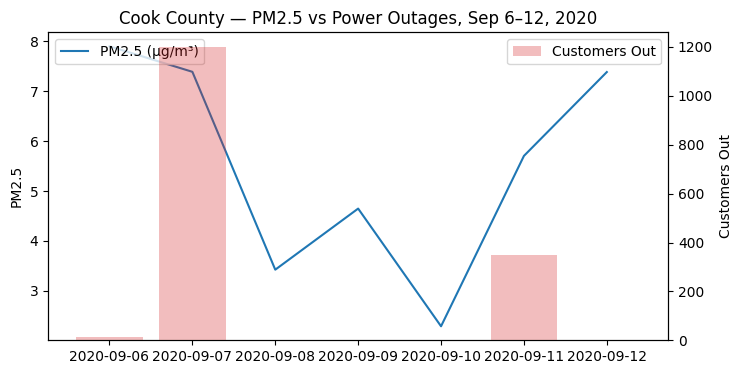

In [16]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(df["date"], df["pm25_mean"], color="tab:blue", label="PM2.5 (µg/m³)")
ax2 = ax1.twinx()
ax2.bar(df["date"], df["cust_out_peak"], alpha=0.3, color="tab:red", label="Customers Out")

ax1.set_ylabel("PM2.5")
ax2.set_ylabel("Customers Out")
plt.title("Cook County — PM2.5 vs Power Outages, Sep 6–12, 2020")
ax1.legend(loc="upper left"); ax2.legend(loc="upper right")
plt.show()


In [19]:
import pandas as pd
import numpy as np

df = pd.read_parquet("../outputs/panel_cook_2020-09-06_12.parquet").copy()

# basic variance check
vars_to_check = ["pm25_mean","share_light","share_moderate","share_heavy"]
print(df[vars_to_check].agg(['min','max','nunique']).T)

# quick correlation matrix of predictors
print(df[["pm25_mean","share_light","share_heavy"]].corr())


                     min       max  nunique
pm25_mean       2.286806  7.901786      7.0
share_light     0.000000  1.000000      3.0
share_moderate  0.000000  0.000000      1.0
share_heavy     0.000000  0.250000      2.0
             pm25_mean  share_light  share_heavy
pm25_mean     1.000000     0.597913     0.375937
share_light   0.597913     1.000000    -0.070014
share_heavy   0.375937    -0.070014     1.000000


In [20]:
df["any_smoke"] = ((df["share_light"] + df["share_moderate"] + df["share_heavy"]) > 0).astype(int)
df["heavy_or_mod"] = ((df["share_moderate"] + df["share_heavy"]) > 0).astype(int)
df[["date","pm25_mean","any_smoke","event_any","cust_out_peak"]]


,date,pm25_mean,any_smoke,event_any,cust_out_peak
0,2020-09-06,7.901786,1,1,15
1,2020-09-07,7.389584,1,1,1200
2,2020-09-08,3.421875,0,0,0
3,2020-09-09,4.646875,1,0,0
4,2020-09-10,2.286806,0,0,0
5,2020-09-11,5.703333,1,1,350
6,2020-09-12,7.385069,1,0,0


In [21]:
# contingency of smoke presence vs outage event
ct = pd.crosstab(df["any_smoke"], df["event_any"], margins=True)
print(ct)

# group means
print(df.groupby("any_smoke")[["pm25_mean","cust_out_peak","event_any"]].mean())


event_any  0  1  All
any_smoke           
0          2  0    2
1          2  3    5
All        4  3    7
           pm25_mean  cust_out_peak  event_any
any_smoke                                     
0           2.854340            0.0        0.0
1           6.605329          313.0        0.6


In [22]:
import statsmodels.api as sm

X = df[["pm25_mean","any_smoke"]]
X = sm.add_constant(X)
y = df["event_any"]

res = sm.Logit(y, X).fit_regularized(alpha=1.0, L1_wt=0.0)  # ridge (L2)
print(res.summary())


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6926841134515211
            Iterations: 3
            Function evaluations: 4
            Gradient evaluations: 3
                           Logit Regression Results                           
Dep. Variable:              event_any   No. Observations:                    7
Model:                          Logit   Df Residuals:                        6
Method:                           MLE   Df Model:                            0
Date:                Fri, 28 Nov 2025   Pseudo R-squ.:                -0.01215
Time:                        12:28:36   Log-Likelihood:                -4.8384
converged:                       True   LL-Null:                       -4.7804
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
con

In [23]:
import statsmodels.formula.api as smf

m1 = smf.logit("event_any ~ any_smoke", data=df).fit(disp=False)
print(m1.summary())


                           Logit Regression Results                           
Dep. Variable:              event_any   No. Observations:                    7
Model:                          Logit   Df Residuals:                        5
Method:                           MLE   Df Model:                            1
Date:                Fri, 28 Nov 2025   Pseudo R-squ.:                  0.2961
Time:                        12:29:04   Log-Likelihood:                -3.3651
converged:                      False   LL-Null:                       -4.7804
Covariance Type:            nonrobust   LLR p-value:                   0.09248
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.8747   2.94e+05  -8.81e-05      1.000   -5.76e+05    5.76e+05
any_smoke     26.2802   2.94e+05   8.94e-05      1.000   -5.76e+05    5.76e+05

Possibly complete quasi-separation: A fraction 0.29

/workspaces/heat-smoke-grid-risk/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
import statsmodels.api as sm
import numpy as np

# Poisson on small N is fragile; keep it simple
X = sm.add_constant(df[["any_smoke"]])
y = df["cust_out_peak"].astype(int)

po = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(po.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:          cust_out_peak   No. Observations:                    7
Model:                            GLM   Df Residuals:                        5
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1616.8
Date:                Fri, 28 Nov 2025   Deviance:                       3212.4
Time:                        12:30:02   Pearson chi2:                 3.43e+03
No. Iterations:                    26   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.2834   1.79e+04     -0.001      0.9

In [26]:
from scipy.stats import fisher_exact

table = pd.crosstab(df["any_smoke"], df["event_any"])
print(table)
oddsratio, p = fisher_exact(table.values)
print({"odds_ratio": oddsratio, "p_value": p})


event_any  0  1
any_smoke      
0          2  0
1          2  3
{'odds_ratio': inf, 'p_value': np.float64(0.4285714285714286)}


In [29]:
import statsmodels.api as sm
X = sm.add_constant(df[["pm25_mean","any_smoke"]])
y = df["event_any"]
res = sm.Logit(y, X).fit_regularized(alpha=1.0, L1_wt=0.0)
print(res.summary())


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6926841134515211
            Iterations: 3
            Function evaluations: 4
            Gradient evaluations: 3
                           Logit Regression Results                           
Dep. Variable:              event_any   No. Observations:                    7
Model:                          Logit   Df Residuals:                        6
Method:                           MLE   Df Model:                            0
Date:                Fri, 28 Nov 2025   Pseudo R-squ.:                -0.01215
Time:                        12:31:42   Log-Likelihood:                -4.8384
converged:                       True   LL-Null:                       -4.7804
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
con

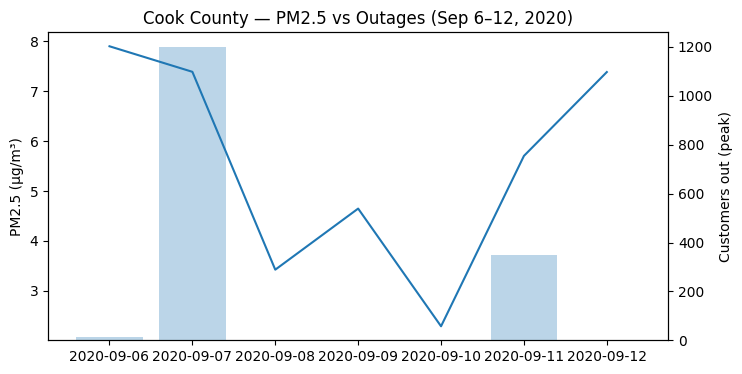

In [30]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(df["date"], df["pm25_mean"]); ax1.set_ylabel("PM2.5 (µg/m³)")
ax2 = ax1.twinx(); ax2.bar(df["date"], df["cust_out_peak"], alpha=0.3); ax2.set_ylabel("Customers out (peak)")
plt.title("Cook County — PM2.5 vs Outages (Sep 6–12, 2020)")
plt.show()


In [32]:
import duckdb

duckdb.sql("""
SELECT 
  MIN(run_start_time) AS min_date,
  MAX(run_start_time) AS max_date,
  COUNT(DISTINCT fips_code) AS n_counties
FROM read_csv_auto('data/raw/eaglei/*.csv', header=True)
""")


ModuleNotFoundError: No module named 'duckdb'

In [34]:
import pandas as pd
pm = pd.read_csv("../data/raw/epa/daily_88101_2020.csv")
pm["Date Local"] = pd.to_datetime(pm["Date Local"])
print(pm["Date Local"].min(), pm["Date Local"].max())


2020-01-01 00:00:00 2020-12-31 00:00:00


In [35]:
pip install duckdb


  Using cached duckdb-1.4.2-cp312-cp312-manylinux_2_26_x86_64.manylinux_2_28_x86_64.whl.metadata (4.3 kB)
Using cached duckdb-1.4.2-cp312-cp312-manylinux_2_26_x86_64.manylinux_2_28_x86_64.whl (20.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [37]:
import duckdb

duckdb.sql("""
SELECT 
  MIN(run_start_time) AS min_date,
  MAX(run_start_time) AS max_date,
  COUNT(DISTINCT fips_code) AS n_counties
FROM read_csv_auto('../data/raw/eaglei/*.csv', header=True)
""")


┌─────────────────────┬─────────────────────┬────────────┐
│      min_date       │      max_date       │ n_counties │
│      timestamp      │      timestamp      │   int64    │
├─────────────────────┼─────────────────────┼────────────┤
│ 2020-09-06 00:00:00 │ 2020-09-11 18:15:00 │          1 │
└─────────────────────┴─────────────────────┴────────────┘

In [38]:
import pandas as pd
from glob import glob

files = glob("../data/raw/eaglei/*.csv")
dfs = [pd.read_csv(f, parse_dates=["run_start_time"]) for f in files]
out = pd.concat(dfs, ignore_index=True)

print(out["run_start_time"].min(), out["run_start_time"].max())
print("Unique counties:", out["fips_code"].nunique())


2020-09-06 00:00:00 2020-09-11 18:15:00
Unique counties: 1


In [39]:
import pandas as pd, glob
for f in glob.glob("outputs/panel_*2020-09-06_2020-09-12.parquet"):
    df = pd.read_parquet(f)
    print(f, "rows:", len(df), "any events:", df["event_any"].sum())
